_Import the `pandas`, `numpy`, `train_test_split`, `LogisticRegression`, `accuracy_score`, `confusion_matrix`, `KNeighborsClassifier`, and `pyplot`._

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

## Problem 1:
An automated answer-rating site marks each post in a community forum website as “good” or “bad” based on the quality of the post. The `quality` CSV file, contains the various types of quality as measured by the tool. Following are the type of qualities that the dataset contains:

i. `num_words`: number of words in the post

ii. `num_characters`: number of characters in the post

iii. `num_misspelled`: number of misspelled words

iv. `bin_end_qmark`: if the post ends with a question mark

v. `num_interrogative`: number of interrogative words in the post

vi. `bin_start_small`: if the answer starts with a lowercase letter. (‘1’ means yes, otherwise no)

vii. `num_sentences`: number of sentences per post

viii. `num_punctuations`: number of punctuation symbols in the post

ix. `label`: the label of the post (‘G’ for good and ‘B’ for bad) as determined by the tool.

Create a logistic regression model to predict the class label from the first eight attributes of the question set. Then try doing the same using two different subsets (your choice) of those eight attributes. Report the accuracies of each of these three models. For the two subsets that you use, provide some justification (why you chose those features in a given subset). As we discussed in the class, it's useful to report not just a single accuracy number for a given model, but either an average accuracy over many runs or a distribution of accuracies over those runs.

_First we need to load in the `quality` dataset:_

In [2]:
df_quality = pd.read_csv('quality.csv')

_Prior to building our models, we can change `label` (indicating whether a post was good (`G`) or bad (`B`)) from a string categorical type to a number categorical type. This allows us to transform this variable to be used as a binomial distribution which can then be modeled using logistic regression. We can assign them as follows:_
> _`G` (good)   :   0_

> _`B`  (bad)   :   1_

In [3]:
df_quality["label"] = np.where(df_quality["label"] ==  "B", 1, 0)

***

### _Create a logistic regression model to predict the class label from the first eight attributes_

_First we can seperate the variables into features and label._

In [4]:
features1 = df_quality.drop("S.No.", axis = 1).drop("label", axis = 1)
label = df_quality["label"]

_Next we can split the data into 70% training and 30% testing. Note that `X` represents the features and `y` represents the label._

In [5]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(features1, label, test_size = 0.30)

_Now we can fit a logistic regression model using `X_train1` as the training features and `y_train1` as the training label._

In [6]:
logit_model = LogisticRegression(max_iter = 10000)
model1 = logit_model.fit(X_train1, y_train1)

_Then we can use this trained model to make predictions for `label` using `X_test1` as the test data._

In [7]:
pred1 = model1.predict(X_test1)

_Then we can use these predictions (`pred1`) and compare them against the actual values (`y_test1`) to determine the accuracy of this model._

In [8]:
print(accuracy_score(y_test1, pred1))

0.3333333333333333


_However, it is more useful to get an average accuracy. So, we can build a function to do this. This function will take in as an input `n` number of times to iterate through the process (spliting the data, training the model, making predictions, and finding the accuracy), `features` to represent which variables to be included as features, and `labels` to indicate which variable to be included as the label. Having the second two as inputs allows this function to become more versitile so that we can use it for the next two parts._

In [9]:
def get_avg_accuracy(n, features, labels):
    tot = 0
    for i in range(0, n):
        X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.30)
        logit_model.fit(X_train, y_train)
        pred = logit_model.predict(X_test)
        tot = tot + accuracy_score(y_test, pred)
    return(tot/n)

_Using this function, we can then find the average accuracy of the model for 100 iterations given the features and label indicated above (`features1` and `label`)._

In [10]:
get_avg_accuracy(100, features1, label)

0.6455555555555555

_Hence, the number above represents the average accuracy of the logistic regression model that predicts the class label from the first eight attributes._

***

### _Create a logistic regression model to predict the class label from the spelling, captilization, and grammar,  attributes_

_When looking at the eight attributes, I noticed that they can be categorized based on different aspects. One such category that can be made could include `num_misspelled`, `bin_start_small`, and `num_punctuations`. These variables all relatively relate to how well a user knows these basic English structures or whether they cared to include them. Hence, these three variables may be useful to model the quality of a post._

_First we can assign these three variables as features. Since the label will be the same as above, we do not need to recreate this variable._

In [11]:
features2 = df_quality.drop("S.No.", axis = 1).drop("num_words", axis = 1).drop("num_characters", axis = 1).drop("bin_end_qmark", axis = 1).drop("num_interrogative", axis = 1).drop("num_sentences", axis = 1).drop("label", axis = 1)

_Next we can split the data into 70% training and 30% testing. Note that `X` represents the features and `y` represents the label._

In [12]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(features2, label, test_size = 0.30)

_Now we can fit a logistic regression model using `X_train2` as the training features and `y_train2` as the training label._

In [13]:
model2 = logit_model.fit(X_train2, y_train2)

_Then we can use this trained model to make predictions for `label` using `X_test2` as the test data._

In [14]:
pred2 = model2.predict(X_test2)

_Then we can use these predictions (`pred2`) and compare them against the actual values (`y_test2`) to determine the accuracy of this model._

In [15]:
print(accuracy_score(y_test2, pred2))

0.3333333333333333


_Again, since it is more useful to get an average accuracy of this model, we can use the `get_avg_accuracy` function we created previously to find the average accuracy of the model for 100 iterations given the features and label indicated above (`features2` and `label`)._

In [16]:
get_avg_accuracy(100, features2, label)

0.4388888888888887

_From this average accuracy, we can see that the first model made from all eight attributes performed better than this second model. This means that these three attributes (`num_misspelled`, `bin_start_small`, and `num_punctuations`) are not very good at predicting the quality of posts (when modeled together)._

***

### _Create a logistic regression model to predict the class label from attributes implying a question_

_Another category that could be made from the eight attribites is those that pertain to questions. Two variables that relate to this are `bin_end_qmark` and `num_interrogative`. Building a model based on these attributes and then measuring its accuracy could examine how well the automated answer-rating site predicts the quality of posts when questions are included._

_First we can assign these three variables as features. Since label will be the same as above, we do not need to recreate this variable._

In [17]:
features3 = df_quality.drop("S.No.", axis = 1).drop("num_words", axis = 1).drop("num_characters", axis = 1).drop("num_misspelled", axis = 1).drop("bin_start_small", axis = 1).drop("num_sentences", axis = 1).drop("num_punctuations", axis = 1).drop("label", axis = 1)

_Next we can split the data into 70% training and 30% testing. Note that `X` represents the features and `y` represents the label._

In [18]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(features3, label, test_size = 0.30)

_Now we can fit a logistic regression model using `X_train3` as the training features and `y_train3` as the training label._

In [19]:
model3 = logit_model.fit(X_train3, y_train3)

_Then we can use this trained model to make predictions for label using `X_test3` as the test data._

In [20]:
pred3 = model3.predict(X_test3)

_Then we can use these predictions (`pred3`) and compare them against the actual values (`y_test3`) to determine the accuracy of this model._

In [21]:
print(accuracy_score(y_test3, pred3))

0.3333333333333333


_Again, since it is more useful to get an average accuracy of this model, we can use the `get_avg_accuracy` function we created previously to find the average accuracy of the model for 100 iterations given the features and label indicated above (`features3` and `label`)._

In [22]:
get_avg_accuracy(100, features3, label)

0.42777777777777787

_From this average accuracy, we can see that the first model made from all eight attributes performed better than this third model and that the second and third model perform about the same. This means that these two attributes (`bin_end_qmark` and `num_interrogative`) are not very good at predicting the quality of posts (when modeled together)._

***

***

***

## Problem 2:

Download the `wine` dataset. It contains information about a number of wines -- their characteristics (features) and if it's considered high quality or not (1 or 0). First, do some experiments (trial-and-error) to figure out a good subset of features to use for learning wine quality (last column). Report these features.

Then, use 70% data for training to build a kNN classifier with different values of k ranging from 2 to 10. Plot your accuracies with each of these. In other words, your final result will be a line chart with k on the x-axis and accuracy on the y-axis.

_First we need to load in the `wine` dataset:_

In [23]:
df_wine = pd.read_csv('wine.csv')

_Prior to building our models, we can change `color` (indicating whether a wine was `red` or `white`) from a string categorical type to a number categorical type. We can assign them as follows:_

> _white : 0_

> _red : 1_

In [24]:
df_wine["color"] = np.where(df_wine["color"] ==  "red", 1, 0)

_To figure out a good subset of features to use for learning whether a wine is of high quality, I created simple logistic models for each of the attributes and measured their average accuracy. They all had an average accuracy of predicting `high_quality` of about 0.8 but with `quality` having an average accuracy of 1.0. The `quality` feature producing a perfect accuracy makes sense since `high_quality` is determined by applying a threshold to `quality`. So while a simple logictic model with simply `quality` being used as the only feature would produce perfect accuracy, it is trivial and not very insightful. Hence, we can instead choose a subset of features that do not include `quality`, such as `fixed_acidity`, `volatile_acidity`, and `citric_acid`._

_So, we can assign these three as the features to use in our model and `high_quality` as the label._

In [25]:
features4 = df_wine.drop("high_quality", axis = 1).drop("residual_sugar", axis = 1).drop("chlorides", axis = 1).drop("free_sulfur_dioxide", axis = 1).drop("total_sulfur_dioxide", axis = 1).drop("density", axis = 1).drop("pH", axis = 1).drop("sulphates", axis = 1).drop("alcohol", axis = 1).drop("quality", axis = 1).drop("color", axis = 1).drop("is_red", axis = 1)
label2 = df_wine["high_quality"]

_Next we can split the data into 70% training and 30% testing. Note that `X` represents the features and `y` represents the label._

In [26]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(features4, label2, test_size = 0.30)

_Now we can build a kNN classifier with different values of `k` ranging from 2 to 10 and later graph the accuracies for each value of `k`. So, first we should create a list to keep track of the values of `k` and another list to track the accuracies at each value of `k`._

In [27]:
k_val = list(range(2,11))
accuracies = list(range(2,11))

> _Note: __[this](https://stackoverflow.com/questions/10712002/create-an-empty-list-in-python-with-certain-size)__ source was used to understand the `range()` function._

Then we can run through each value of `k` from 2 to 10 and track the accuracies for each of these k-values.

In [28]:
i = 0
for k in range(2,11):
    k_val[i] = k
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train4, y_train4)
    pred_knn = knn.predict(X_test4)
    accuracies[i] = accuracy_score(y_test4, pred_knn)
    i = i + 1

_Next we can combine these values of `k` and their corresponding accuracies into a dataframe that can be used to visually plot the results._

In [29]:
data = {'k_val' : k_val, 'accuracies' : accuracies}
df_accuracies = pd.DataFrame(data)
df_accuracies

,k_val,accuracies
0,2,0.807692
1,3,0.772821
2,4,0.790256
3,5,0.782051
4,6,0.804615
5,7,0.789231
6,8,0.809744
7,9,0.801026
8,10,0.808718


_Now we can plot this dataframe to see how the accuracy of our kNN classifier model varies as `k` ranges from 2 to 10._

Text(0.5, 1.0, 'kNN Classifier Model Accuracies')

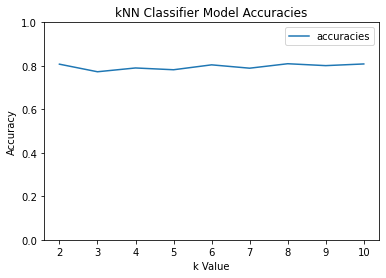

In [30]:
df_accuracies.plot(x = "k_val", y = "accuracies", kind = "line")
plt.ylim([0, 1])
plt.xlabel("k Value")
plt.ylabel("Accuracy")
plt.title("kNN Classifier Model Accuracies")

> _Note: __[this](https://stackabuse.com/how-to-set-axis-range-xlim-ylim-in-matplotlib/)__ source was used to determine how to change the axis boundaries._